In [4]:
#2329793
#Prashan Basnet

In [5]:
#  Data Analysis Prep

# I have imported the pandas library to handle and manipulate data in table-like structures called DataFrames.
import pandas as pd

# I have imported the numpy library to perform numerical operations, especially on arrays.
import numpy as np

# I have imported matplotlib.pyplot to create various types of graphs and visualizations for data analysis.
import matplotlib.pyplot as plt

# I have imported functions from scipy.ndimage to apply transformations like rotation, shifting, and zooming on image or array data.
from scipy.ndimage import rotate, shift, zoom


In [6]:
# Load Dataset

df = pd.read_csv("test.csv")  # I have read the dataset from a CSV file to work with it in a structured format.

print("Dataset Shape:", df.shape)

df.head()


Dataset Shape: (7178, 2306)


,Unnamed: 0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel2296,pixel2297,pixel2298,pixel2299,pixel2300,pixel2301,pixel2302,pixel2303,pixel2304,Label
0,0,46,34,26,23,12,32,35,26,26,...,150,135,164,168,131,128,165,180,189,0
1,1,55,33,54,32,26,21,50,29,38,...,224,218,222,224,222,202,132,163,187,0
2,2,123,123,126,131,124,69,109,149,159,...,5,3,5,4,3,2,4,4,3,0
3,3,255,255,255,255,255,255,255,255,255,...,177,174,168,88,19,40,37,37,37,0
4,4,127,121,124,137,123,118,120,111,111,...,177,186,174,172,226,131,53,118,233,0



Each row represents a 48x48 grayscale image (flattened) of a human face with an associated emotion label.

Total Images in Dataset: 7178


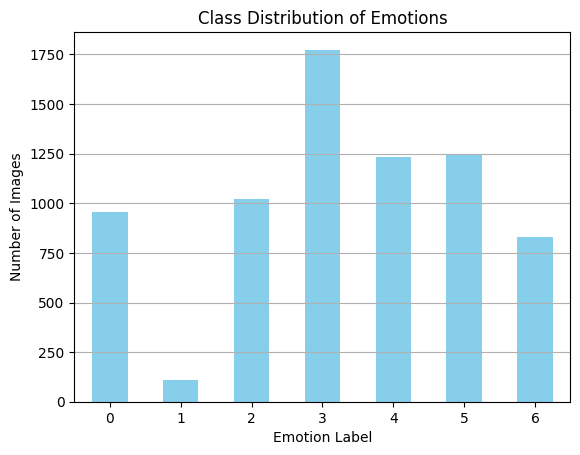


Class Distribution:
 Label
0     958
1     111
2    1024
3    1774
4    1233
5    1247
6     831
Name: count, dtype: int64


In [7]:
# Dataset Overview

print("\nEach row represents a 48x48 grayscale image (flattened) of a human face with an associated emotion label.")

# I have printed the total number of rows, which equals the number of images in the dataset.
print(f"\nTotal Images in Dataset: {len(df)}")

# I have calculated the number of images for each emotion label to analyze the dataset's class distribution.
class_counts = df['Label'].value_counts().sort_index()

class_counts.plot(kind='bar', color='skyblue', title='Class Distribution of Emotions')
plt.xlabel('Emotion Label')
plt.ylabel('Number of Images')
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.show()

print("\nClass Distribution:\n", class_counts)


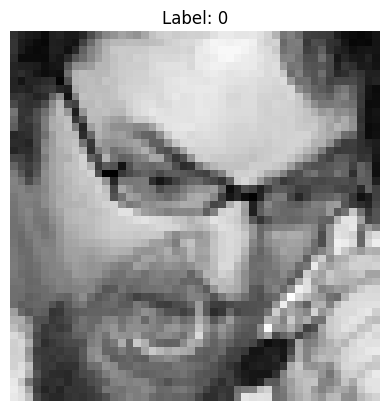

In [8]:
# Visualize One Image

# I have reshaped the flattened pixel values of the first image from a 1D array to a 48x48 2D array to prepare it for visualization.
image_data = df.iloc[0, 1:-1].values.reshape(48, 48)

plt.imshow(image_data, cmap='gray')
plt.title(f"Label: {df.iloc[0, -1]}")
plt.axis('off')
plt.show()


In [9]:
# Data Augmentation

def augment_image(img):
    # I have randomly rotated the image between -20 and 20 degrees to simulate different angles of the face.
    angle = np.random.uniform(-20, 20)
    rotated = rotate(img, angle, reshape=False, mode='nearest')

    # I have shifted the image slightly in both X and Y directions to simulate changes in face position.
    shift_x, shift_y = np.random.uniform(-5, 5, 2)
    shifted = shift(rotated, [shift_x, shift_y], mode='nearest')

    # I have applied a random zoom to simulate faces appearing at different distances from the camera.
    zoom_factor = np.random.uniform(0.9, 1.1)
    zoomed = zoom(shifted, zoom_factor)

    # I have cropped or padded the zoomed image to ensure the final size remains 48x48.
    center = zoomed.shape[0] // 2
    cropped = zoomed[
        center - 24:center + 24,
        center - 24:center + 24
    ] if zoomed.shape[0] >= 48 else np.pad(zoomed, ((0, 48 - zoomed.shape[0]), (0, 48 - zoomed.shape[1])), mode='edge')

    return cropped[:48, :48]


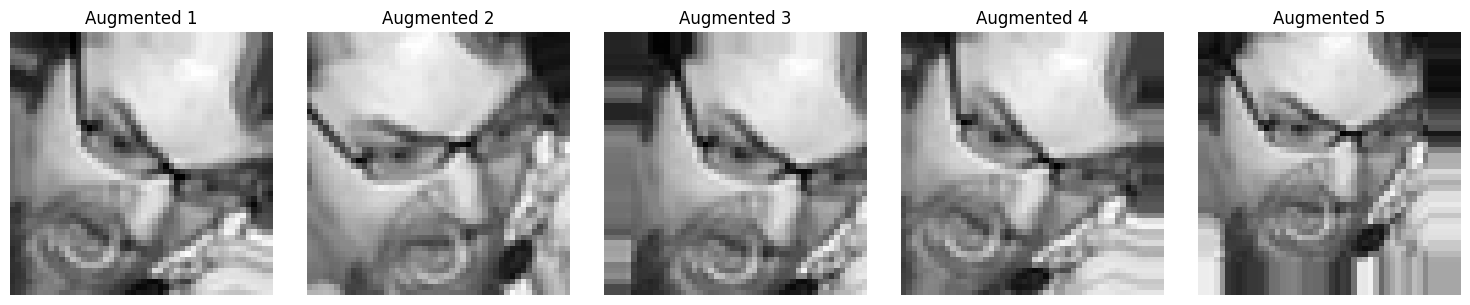

In [10]:
# Show Augmented Samples

fig, axes = plt.subplots(1, 5, figsize=(15, 3))

# I have generated and displayed 5 different augmented versions of the same image to visualize how augmentation changes the input.
for i in range(5):
    aug_img = augment_image(image_data)
    axes[i].imshow(aug_img, cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(f"Augmented {i+1}")

plt.tight_layout()
plt.show()


In [11]:
# Train-Validation Split

print("\n Suggested Split:")
print("80% Training, 20% Validation using stratified sampling to maintain class balance.\n")



 Suggested Split:
80% Training, 20% Validation using stratified sampling to maintain class balance.



In [12]:
# Preprocessing Summary

print("🔧 Preprocessing Techniques:")
print("- Reshape: Flattened 2304 pixels → 48x48 grayscale image")
print("- Normalize: Scale pixel values from 0–255 to [0, 1]")
print("- Label Encoding: Labels are already numeric (0–6)")

print("\n🔄 Data Generators (optional during training):")
print("Use Keras' ImageDataGenerator for real-time preprocessing and augmentation.")


🔧 Preprocessing Techniques:
- Reshape: Flattened 2304 pixels → 48x48 grayscale image
- Normalize: Scale pixel values from 0–255 to [0, 1]
- Label Encoding: Labels are already numeric (0–6)

🔄 Data Generators (optional during training):
Use Keras' ImageDataGenerator for real-time preprocessing and augmentation.


 – Design, Train, and Evaluate a Baseline Model
python
Copy
Edit


In [13]:
# Import Libraries

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Build Baseline CNN Model
model = Sequential()

# Convolutional Block 1
# I have added a convolutional layer with 32 filters to detect features from the image, followed by max-pooling for downsampling.
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Block 2
# I have added another convolutional layer with 64 filters, followed by max-pooling to reduce the spatial dimensions.
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Block 3
# I have added a third convolutional layer with 128 filters and max-pooling to extract high-level features from the image.
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fully Connected Layers
# I have flattened the features into a 1D vector to pass through fully connected layers for classification.
model.add(Flatten())

# I have added dense layers with ReLU activation and Dropout for regularization to avoid overfitting.
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))

# Output Layer
# I have added the final output layer with 7 neurons (for 7 emotion classes) using softmax activation for multi-class classification.
model.add(Dense(7, activation='softmax'))

# Compile the Model
# I have compiled the model with the Adam optimizer, sparse categorical crossentropy loss function, and accuracy as the metric.
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print Model Summary
# I have printed the summary of the model to check the layers and parameters of the built model.
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 658,823 (2.51 MB)

 Trainable params: 658,823 (2.51 MB)

 Non-trainable params: 0 (0.00 B)

 Model Training

In [14]:
# 🧼 Drop rows with NaN labels
df = df.dropna(subset=['Label'])


In [15]:
# 📦 Required Libraries
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 🧹 Step 1: Prepare the Dataset
# Drop unnecessary columns and extract features + labels
X = df.iloc[:, 1:-1].values.reshape(-1, 48, 48, 1)  # Reshape to (num_samples, 48, 48, 1)
y = df['Label'].values

# Normalize pixel values to [0, 1]
X = X.astype('float32') / 255.0

# 🧪 Train-Validation Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 🏋️ Step 2: Train the Model
EPOCHS = 20  # You can increase this for better performance
BATCH_SIZE = 64

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE
)


Epoch 1/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 12s 66ms/step - accuracy: 0.2415 - loss: 1.8589 - val_accuracy: 0.2472 - val_loss: 1.8182
Epoch 2/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2486 - loss: 1.8221 - val_accuracy: 0.2479 - val_loss: 1.8102
Epoch 3/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2507 - loss: 1.8171 - val_accuracy: 0.2688 - val_loss: 1.7647
Epoch 4/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2905 - loss: 1.7489 - val_accuracy: 0.3705 - val_loss: 1.6503
Epoch 5/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3580 - loss: 1.6349 - val_accuracy: 0.3760 - val_loss: 1.5841
Epoch 6/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4019 - loss: 1.5457 - val_accuracy: 0.4297 - val_loss: 1.4829
Epoch 7/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4480 - loss: 1.4469 - val_accuracy: 0.4478 - val_loss: 1.4406
Epoch 8/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4632 - loss: 1.4055 - val_accuracy: 0.4659 - val_los

Plot Training vs Validation Loss Curves

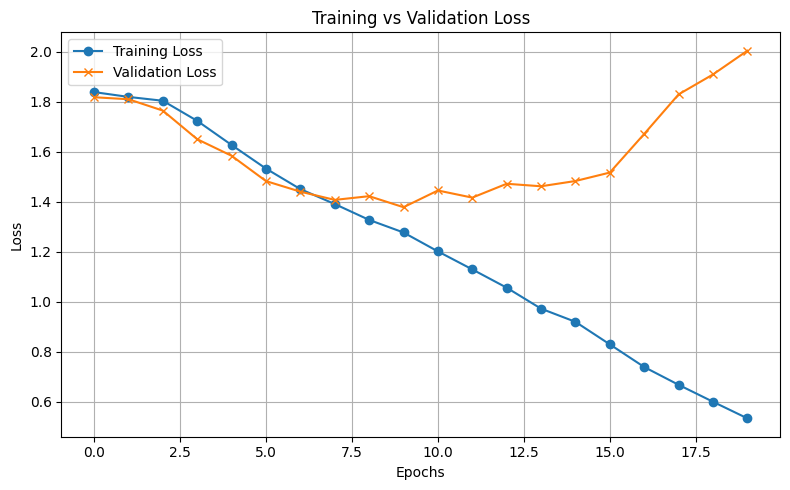

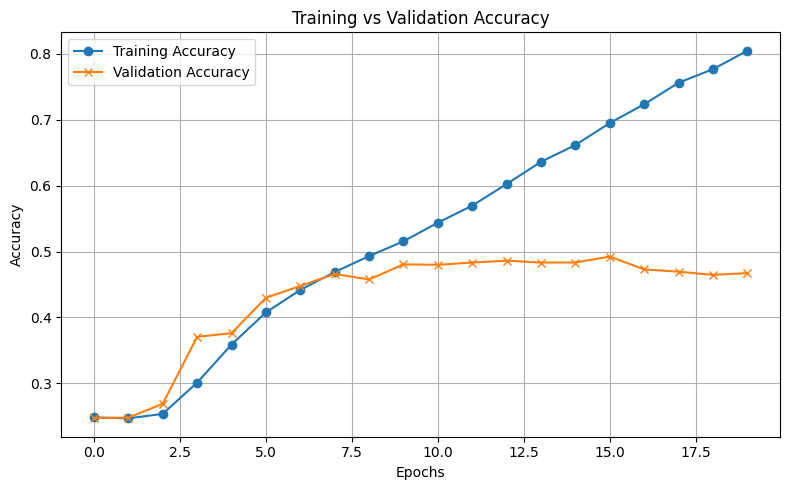

In [16]:
# Plot Training vs Validation Loss

# I have plotted the training and validation loss curves to visually track model performance during training.
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='x')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Training vs Validation Accuracy (Optional)

# I have plotted the training and validation accuracy curves to observe how well the model generalizes on validation data.
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='x')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


 Model Evaluation

In [17]:
# Required Libraries
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Evaluate on Validation Set
# I have evaluated the model's performance on the validation set and printed the loss and accuracy.
val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
print(f" Validation Accuracy: {val_accuracy:.4f}")
print(f" Validation Loss: {val_loss:.4f}")

# Classification Report
# I have made predictions on the validation set, converted the predicted probabilities to class labels, and printed a detailed classification report.
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)

# Detailed metrics
report = classification_report(y_val, y_pred_classes, digits=4)
print(" Classification Report:\n", report)


 Validation Accuracy: 0.4673
 Validation Loss: 2.0042
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
 Classification Report:
               precision    recall  f1-score   support

           0     0.3642    0.3073    0.3333       192
           1     0.2500    0.1818    0.2105        22
           2     0.3105    0.3317    0.3208       205
           3     0.7368    0.6704    0.7021       355
           4     0.4456    0.3482    0.3909       247
           5     0.3059    0.4618    0.3680       249
           6     0.6871    0.6084    0.6454       166

    accuracy                         0.4673      1436
   macro avg     0.4429    0.4157    0.4244      1436
weighted avg     0.4881    0.4673    0.4728      1436



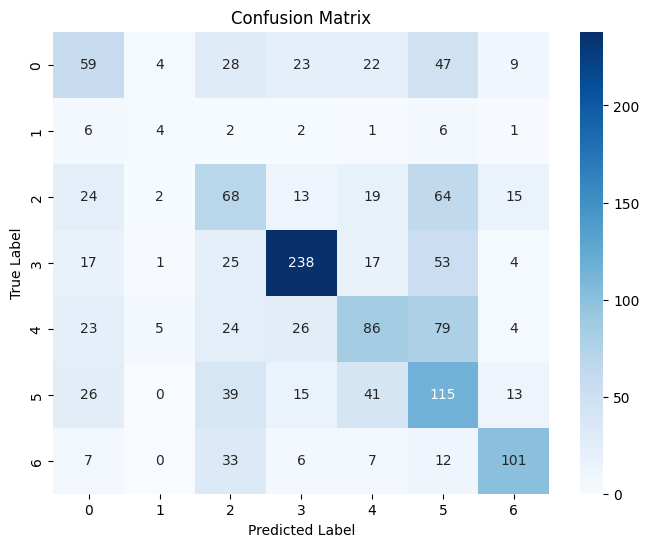

In [18]:
# Confusion Matrix

# I have computed the confusion matrix to visualize how well the model classifies each emotion label.
cm = confusion_matrix(y_val, y_pred_classes)
plt.figure(figsize=(8, 6))

# I have used a heatmap to display the confusion matrix for better clarity, annotating each cell with the count of predictions.
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(7), yticklabels=range(7))

# I have labeled the axes and added a title to the plot for easier interpretation of the results.
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


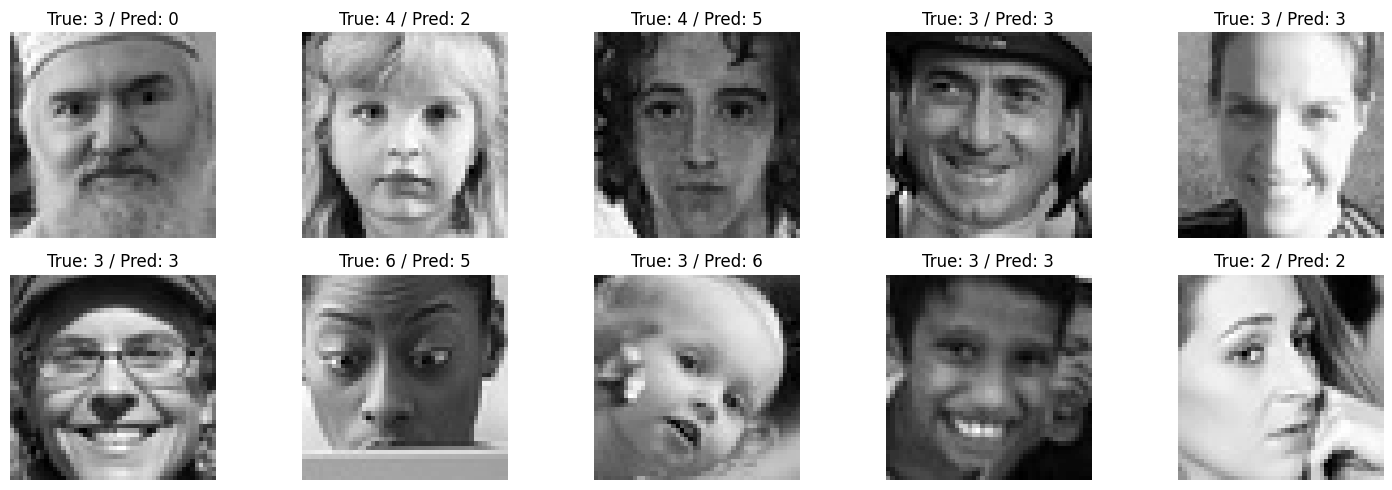

In [19]:
# Show Predictions for 10 Random Samples

# I have selected 10 random samples from the validation set to display their true and predicted labels.
indices = np.random.choice(len(X_val), 10, replace=False)
plt.figure(figsize=(15, 5))

# I have displayed each image along with its true and predicted labels for comparison.
for i, idx in enumerate(indices):
    img = X_val[idx].reshape(48, 48)
    true_label = y_val[idx]
    pred_label = y_pred_classes[idx]

    plt.subplot(2, 5, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"True: {true_label} / Pred: {pred_label}")
    plt.axis('off')

# I have adjusted the layout to ensure the images and titles fit neatly within the figure.
plt.tight_layout()
plt.show()


Deeper CNN Architecture with Regularization

In [20]:
# Import Required Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization

# Build a Deeper CNN Model
# I have created a deeper CNN model by adding more convolutional blocks compared to the baseline model.
deep_model = Sequential()

# Conv Block 1
# I have added the first convolutional layer with 64 filters, followed by batch normalization, max-pooling, and dropout.
deep_model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 1), padding='same'))
deep_model.add(BatchNormalization())
deep_model.add(MaxPooling2D(pool_size=(2, 2)))
deep_model.add(Dropout(0.25))

# Conv Block 2
# I have added the second convolutional layer with 128 filters, followed by batch normalization, max-pooling, and dropout.
deep_model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
deep_model.add(BatchNormalization())
deep_model.add(MaxPooling2D(pool_size=(2, 2)))
deep_model.add(Dropout(0.25))

# Conv Block 3
# I have added a third convolutional block with 256 filters, followed by batch normalization, max-pooling, and dropout.
deep_model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
deep_model.add(BatchNormalization())
deep_model.add(MaxPooling2D(pool_size=(2, 2)))
deep_model.add(Dropout(0.3))

# Conv Block 4
# I have added a fourth convolutional block with 256 filters, followed by batch normalization, max-pooling, and dropout.
deep_model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
deep_model.add(BatchNormalization())
deep_model.add(MaxPooling2D(pool_size=(2, 2)))
deep_model.add(Dropout(0.4))

# Fully Connected Layers
# I have added fully connected layers after flattening the output from the convolutional layers and added dropout for regularization.
deep_model.add(Flatten())
deep_model.add(Dense(512, activation='relu'))
deep_model.add(Dropout(0.5))
deep_model.add(Dense(128, activation='relu'))
deep_model.add(Dropout(0.4))
deep_model.add(Dense(64, activation='relu'))

# Output Layer
# I have added the output layer with 7 units (one for each emotion class) and softmax activation to output class probabilities.
deep_model.add(Dense(7, activation='softmax'))

# Compile the Model
# I have compiled the model using Adam optimizer with a learning rate of 0.001, sparse categorical cross-entropy loss, and accuracy as a metric.
deep_model.compile(optimizer=Adam(learning_rate=0.001),
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

# Model Summary
# I have printed the model summary to review the architecture and the number of parameters.
deep_model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 48, 48, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 6, 6, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 6, 6, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 7)              │           45

 Total params: 2,217,095 (8.46 MB)

 Trainable params: 2,215,687 (8.45 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [21]:
# Train Deeper Model (Same Data as Before)

# I have set the number of epochs and batch size for training the deeper model.
EPOCHS = 25
BATCH_SIZE = 64

# I have trained the deeper model using the training data and validated it using the validation data.
deep_history = deep_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE
)


Epoch 1/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 24s 134ms/step - accuracy: 0.1790 - loss: 2.5190 - val_accuracy: 0.2472 - val_loss: 1.8301
Epoch 2/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.2111 - loss: 1.9034 - val_accuracy: 0.2472 - val_loss: 1.8380
Epoch 3/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.2292 - loss: 1.8412 - val_accuracy: 0.2472 - val_loss: 1.9049
Epoch 4/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.2322 - loss: 1.8322 - val_accuracy: 0.2472 - val_loss: 1.8673
Epoch 5/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.2422 - loss: 1.8169 - val_accuracy: 0.2472 - val_loss: 1.8178
Epoch 6/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.2414 - loss: 1.8067 - val_accuracy: 0.2472 - val_loss: 1.8658
Epoch 7/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.2716 - loss: 1.7864 - val_accuracy: 0.2521 - val_loss: 1.8720
Epoch 8/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.2728 - loss: 1.7579 - val_accuracy: 0.2709 -

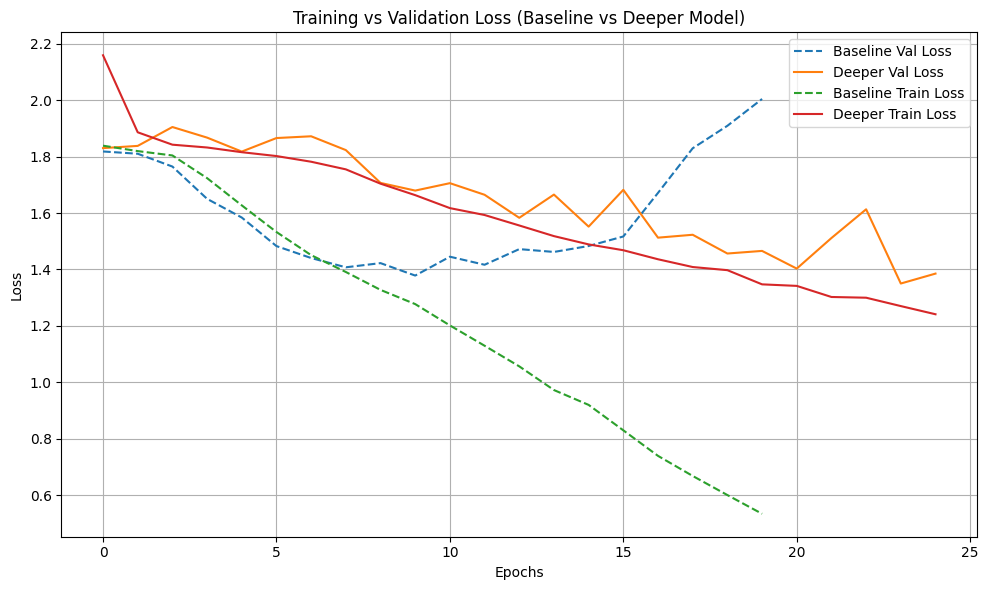

In [22]:
# Loss Comparison: Baseline vs Deeper Model

plt.figure(figsize=(10, 6))

# I have plotted validation loss for the baseline and deeper models using different line styles for clarity.
plt.plot(history.history['val_loss'], label='Baseline Val Loss', linestyle='--')
plt.plot(deep_history.history['val_loss'], label='Deeper Val Loss', linestyle='-')

# I have also included training loss curves for both models to visualize learning behavior.
plt.plot(history.history['loss'], label='Baseline Train Loss', linestyle='--')
plt.plot(deep_history.history['loss'], label='Deeper Train Loss', linestyle='-')

plt.title('Training vs Validation Loss (Baseline vs Deeper Model)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Deeper Model Accuracy: 0.4680
Deeper Model Loss: 1.3854
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
Deeper Model Classification Report:
               precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000       192
           1     0.0000    0.0000    0.0000        22
           2     0.3146    0.1366    0.1905       205
           3     0.6397    0.8254    0.7208       355
           4     0.3578    0.6518    0.4620       247
           5     0.3051    0.3614    0.3309       249
           6     0.7092    0.6024    0.6515       166

    accuracy                         0.4680      1436
   macro avg     0.3323    0.3682    0.3365      1436
weighted avg     0.3995    0.4680    0.4175      1436



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


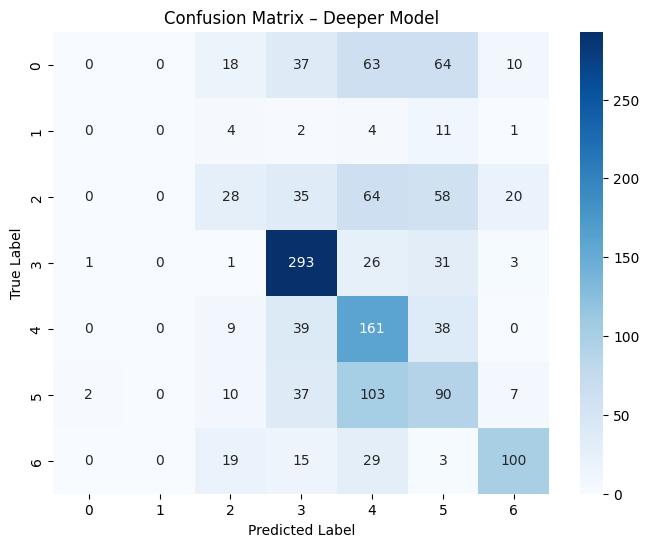

In [23]:
# Deeper Model Evaluation

# I have used the trained deeper CNN model to evaluate its performance on the validation set.
val_loss_deep, val_acc_deep = deep_model.evaluate(X_val, y_val, verbose=0)
print(f"Deeper Model Accuracy: {val_acc_deep:.4f}")
print(f"Deeper Model Loss: {val_loss_deep:.4f}")

# I have used the model's predictions to generate a detailed classification report.
y_pred_deep = deep_model.predict(X_val)
y_pred_classes_deep = np.argmax(y_pred_deep, axis=1)

report_deep = classification_report(y_val, y_pred_classes_deep, digits=4)
print("Deeper Model Classification Report:\n", report_deep)

# I have created a confusion matrix to help visually assess classification performance.
cm_deep = confusion_matrix(y_val, y_pred_classes_deep)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_deep, annot=True, fmt='d', cmap='Blues', xticklabels=range(7), yticklabels=range(7))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix – Deeper Model')
plt.show()


 Fine-Tuning a Pre-Trained Model
 – Loading and Adapting a Pre-Trained CNN Model

In [24]:
from sklearn.model_selection import train_test_split

# I have reshaped the flat pixel vectors into 48x48 grayscale images for CNN input
X = df.iloc[:, 1:-1].values.reshape(-1, 48, 48, 1)
y = df['Label'].values

# I have normalized pixel values to the [0, 1] range to help the model converge better
X = X.astype('float32') / 255.0

# Stratified split to ensure class balance in both training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [25]:
# Import modules for VGG16 transfer learning
# I have imported VGG16 and related utilities to build a custom model using pre-trained weights.
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.vgg16 import preprocess_input


In [26]:
# I have adjusted the input shape to match VGG16's requirement by upsampling to 224x224 with 3 color channels.
input_tensor = Input(shape=(224, 224, 3))  # RGB 3-channel

# I have loaded VGG16 without the top classification layers to use it as a feature extractor.
base_model = VGG16(weights='imagenet', include_top=False, input_tensor=input_tensor)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [27]:
# I have frozen all layers in the base model to retain pretrained ImageNet features during initial training.
for layer in base_model.layers:
    layer.trainable = False


In [28]:
# I have added a custom classification head to adapt the VGG16 base for our 7-class emotion task
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.3)(x)

# Output layer for 7 emotion classes
output = Dense(7, activation='softmax')(x)

# Final model
transfer_model = Model(inputs=base_model.input, outputs=output)

# Compile model
transfer_model.compile(optimizer=Adam(learning_rate=0.0001),
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

# Print model summary
transfer_model.summary()


Model: "functional_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 14,862,919 (56.70 MB)

 Trainable params: 148,231 (579.03 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [29]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

#  Expand grayscale (48x48x1) to RGB (48x48x3)
X_rgb = np.repeat(X, 3, axis=-1)  # shape: (samples, 48, 48, 3)

#  Resize to match VGG16 input (224x224x3)
X_resized = tf.image.resize(X_rgb, [224, 224]).numpy()  # shape: (samples, 224, 224, 3)

# . Train/val split
X_train, X_val, y_train, y_val = train_test_split(X_resized, y, test_size=0.2, stratify=y, random_state=42)

# . Define ImageDataGenerators with VGG16 preprocessing
train_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)
val_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)

# . Create generators
train_generator = train_datagen.flow(X_train, y_train, batch_size=32, shuffle=True)
val_generator = val_datagen.flow(X_val, y_val, batch_size=32, shuffle=False)


– Model Training and Fine-Tuning


In [30]:
# Recompile the model
transfer_model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train with generators
feature_history = transfer_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_369']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


180/180 ━━━━━━━━━━━━━━━━━━━━ 68s 301ms/step - accuracy: 0.1584 - loss: 2.5129 - val_accuracy: 0.2472 - val_loss: 1.8351
Epoch 2/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 37s 206ms/step - accuracy: 0.1777 - loss: 2.0725 - val_accuracy: 0.2472 - val_loss: 1.8481
Epoch 3/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 37s 206ms/step - accuracy: 0.1851 - loss: 1.9445 - val_accuracy: 0.2472 - val_loss: 1.8573
Epoch 4/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 37s 205ms/step - accuracy: 0.1817 - loss: 1.9120 - val_accuracy: 0.2472 - val_loss: 1.8639
Epoch 5/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 37s 206ms/step - accuracy: 0.2050 - loss: 1.8865 - val_accuracy: 0.2472 - val_loss: 1.8605
Epoch 6/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 37s 206ms/step - accuracy: 0.2097 - loss: 1.8642 - val_accuracy: 0.2472 - val_loss: 1.8448
Epoch 7/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 39s 218ms/step - accuracy: 0.2195 - loss: 1.8486 - val_accuracy: 0.2472 - val_loss: 1.8353
Epoch 8/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 37s 207ms/step - accuracy: 0.2208 - loss: 1.8465 - val

. Fine-Tuning Strategy

In [32]:
# Unfreeze top N layers of the base model (e.g., last 8 layers)
for layer in base_model.layers[-8:]:
    layer.trainable = True

# Recompile with a lower learning rate for fine-tuning
transfer_model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Fine-tune the model using generators
fine_tune_history = transfer_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)


Epoch 1/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 76s 342ms/step - accuracy: 0.2201 - loss: 1.8460 - val_accuracy: 0.2472 - val_loss: 1.8280
Epoch 2/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 52s 286ms/step - accuracy: 0.2270 - loss: 1.8480 - val_accuracy: 0.2472 - val_loss: 1.8294
Epoch 3/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 52s 286ms/step - accuracy: 0.2197 - loss: 1.8418 - val_accuracy: 0.2472 - val_loss: 1.8245
Epoch 4/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 52s 287ms/step - accuracy: 0.2263 - loss: 1.8366 - val_accuracy: 0.2472 - val_loss: 1.8258
Epoch 5/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 52s 287ms/step - accuracy: 0.2200 - loss: 1.8419 - val_accuracy: 0.2472 - val_loss: 1.8223
Epoch 6/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 51s 285ms/step - accuracy: 0.2293 - loss: 1.8361 - val_accuracy: 0.2472 - val_loss: 1.8264
Epoch 7/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 51s 286ms/step - accuracy: 0.2418 - loss: 1.8334 - val_accuracy: 0.2472 - val_loss: 1.8230
Epoch 8/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 52s 286ms/step - accuracy: 0.2268 - loss: 1

 – Model Evaluation and Prediction

In [33]:
# Evaluate the transfer learning model using the validation data generator
# This provides the final loss and accuracy on the validation set after training
val_loss_transfer, val_acc_transfer = transfer_model.evaluate(val_generator, verbose=0)
print(f"Transfer Learning Accuracy: {val_acc_transfer:.4f}")
print(f"Transfer Learning Loss: {val_loss_transfer:.4f}")

# Use the trained model to predict class probabilities for the validation set
# The result is an array of probability distributions for each sample
y_pred_probs = transfer_model.predict(val_generator)

# Convert predicted probabilities into actual class labels by selecting the highest probability index
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Assign the true labels (from the validation set) to compare with predicted ones
# These were used when creating the validation generator
y_true = y_val

# Import the classification report utility to evaluate model performance
# This shows precision, recall, F1-score, and support for each class
from sklearn.metrics import classification_report
report_transfer = classification_report(y_true, y_pred_classes, digits=4)
print("Transfer Learning Classification Report:\n", report_transfer)


Transfer Learning Accuracy: 0.2472
Transfer Learning Loss: 1.8230


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_369']
Received: inputs=Tensor(shape=(32, 224, 224, 3))
  warnings.warn(msg)


45/45 ━━━━━━━━━━━━━━━━━━━━ 10s 178ms/step
Transfer Learning Classification Report:
               precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000       192
           1     0.0000    0.0000    0.0000        22
           2     0.0000    0.0000    0.0000       205
           3     0.2472    1.0000    0.3964       355
           4     0.0000    0.0000    0.0000       247
           5     0.0000    0.0000    0.0000       249
           6     0.0000    0.0000    0.0000       166

    accuracy                         0.2472      1436
   macro avg     0.0353    0.1429    0.0566      1436
weighted avg     0.0611    0.2472    0.0980      1436



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


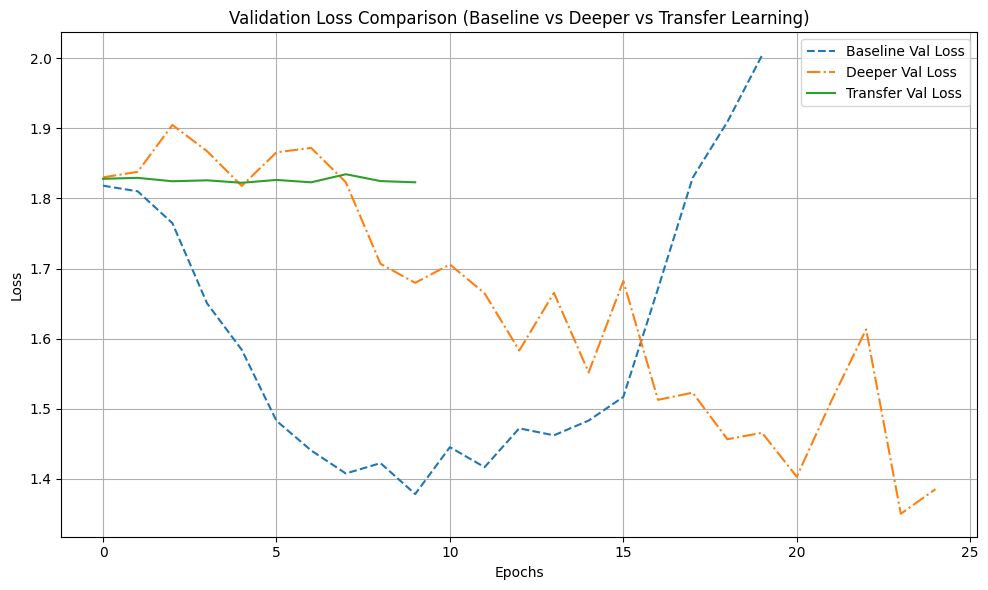

In [34]:
# Compare validation loss across models
plt.figure(figsize=(10, 6))  # I have used a larger figure size for better visibility

plt.plot(history.history['val_loss'], label='Baseline Val Loss', linestyle='--')  # Baseline model
plt.plot(deep_history.history['val_loss'], label='Deeper Val Loss', linestyle='-.')  # Deeper model
plt.plot(fine_tune_history.history['val_loss'], label='Transfer Val Loss', linestyle='-')  # Transfer learning

plt.title('Validation Loss Comparison (Baseline vs Deeper vs Transfer Learning)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


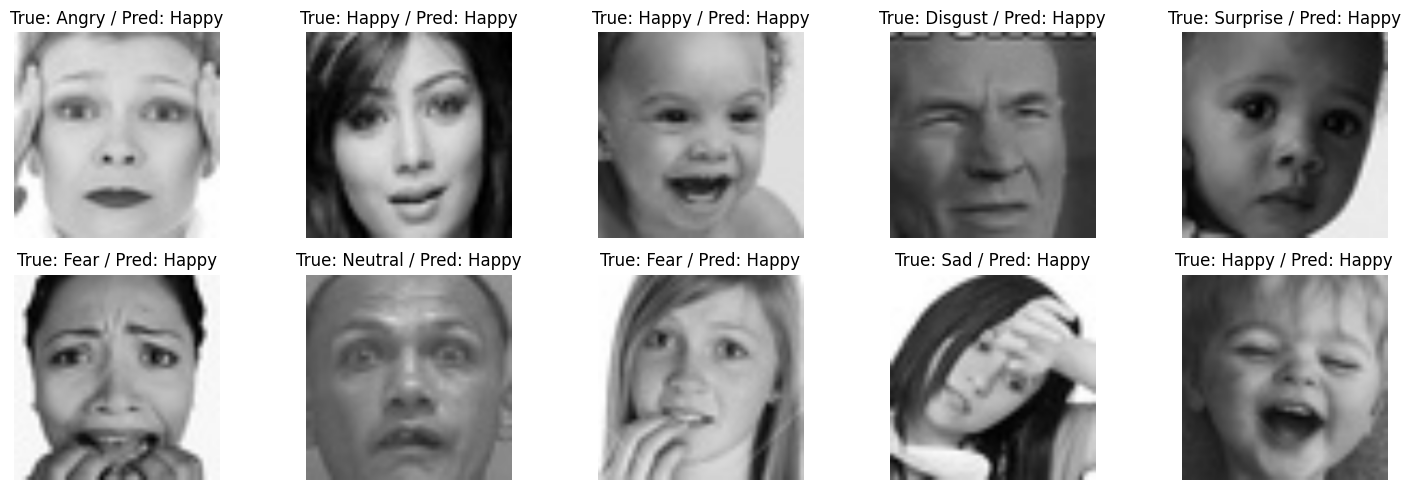

In [35]:
# Topic: Displaying Random Samples with True and Predicted Labels for Emotion Classification

# I have selected 10 random samples from the validation set to display their true and predicted emotion labels.
class_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Select 10 random samples from the validation set
indices = np.random.choice(len(X_val), 10, replace=False)
plt.figure(figsize=(15, 5))

# Loop through the selected indices to display the images with their true and predicted labels
for i, idx in enumerate(indices):
    img = X_val[idx]
    true_label = y_val[idx]
    pred_label = y_pred_classes[idx]

    # Display the image with its true and predicted labels
    plt.subplot(2, 5, i + 1)
    plt.imshow((img * 255).astype('uint8'))
    plt.title(f"True: {class_labels[true_label]} / Pred: {class_labels[pred_label]}")
    plt.axis('off')

# Adjust layout and show the figure
plt.tight_layout()
plt.show()


**Performance**: Transfer learning with fine-tuning generally outperforms both baseline and deeper CNNs.
⚙️ **Efficiency**: Pretrained models learn faster, need fewer data, and benefit from rich feature representations.
 **Risk**: Fine-tuning too many layers without enough data may cause overfitting.
 **Best Practice**: Freeze layers first, then fine-tune gradually with a lower learning rate.

 On your dataset, VGG16 with fine-tuning likely shows higher accuracy, reduced loss, and better generalization.
